### 4. Γεωμετρική Αναζήτηση

In [378]:
class InternalNode:
    def __init__(self, x_mid):
        self.x_mid = x_mid
        self.left = None
        self.right = None
        self.assoc = None
        self.S = None

class LeafNode:
    def __init__(self, point):
        self.point = point
        self.assoc = None

def split_by_x(Py, x_mid):
    Py_left = []
    Py_right = []
    
    for p in Py:
        if p[0] <= x_mid:
            Py_left.append(p)
        else:
            Py_right.append(p)
    
    return np.array(Py_left), np.array(Py_right)

def build_2d_range_tree(points):
    def build_tree(P):
        Tassoc = build_bst(P["y"])
        print(P["y"], P["len"])
        if P["len"] == 1:
            v = LeafNode(point=P["x"][0])
            v.assoc = Tassoc
            return v
        else:
            # P.sort(key=lambda p: p[0])  # Sort by x-coordinate
            Px = P["x"]
            Py = P["y"]
            mid = P["len"] // 2
            x_mid = Px[mid-1][0]
            P_left = {}
            P_right = {}
            P_left["x"] = Px[:mid]
            P_right["x"] = Px[mid:]
            P_left["y"], P_right["y"] = split_by_x(Py, x_mid)
            P_left["len"] = len(P_left["x"])
            P_right["len"] = len(P_right["x"])
            v = InternalNode(x_mid=x_mid)
            # print(v.x_mid,P["len"], len(count))
            v.S = Px
            v.left = build_tree(P_left)
            v.right = build_tree(P_right)
            v.assoc = Tassoc
            return v

    def build_bst(P):
        # if not len(P):
            # return None
        # print(P)
        if len(P) == 1:
            return LeafNode(point=P[0])
        mid = len(P) // 2
        if len(P) == 3:
            print(P)
        node = InternalNode(x_mid=P[mid-1][1])  # Using y-coordinate as x_mid for the associated structure
        node.left = build_bst(P[:mid])
        node.right = build_bst(P[mid:])
        node.S = P
        return node

    return build_tree(points)

# Helper function to print the tree (for debugging)
def print_tree(node, level=0):
    if isinstance(node, LeafNode):
        print("  " * level + f"Leaf: point={node.point}")
    elif isinstance(node, InternalNode):
        print("  " * level + f"Internal: x_mid={node.x_mid}")
        print("  " * level + f"Assoc:")
        print_tree(node.assoc, level+3)
        print("  " * level + "Left:")
        print_tree(node.left, level + 1)
        print("  " * level + "Right:")
        print_tree(node.right, level + 1)

# Example usage
import numpy as np

def parse_points(points_str):
    # Split the string by spaces to get individual point strings
    point_strings = points_str.split()
    
    # Split each point string by comma and convert to tuples of integers
    points = [tuple(map(int, point.split(','))) for point in point_strings]
    
    # Convert the list of tuples to a NumPy ndarray
    points_array = np.array(points)
    
    return points_array

points_str = """
113,78
251,197
513,170
521,213
536,65
819,356
889,103
944,234
"""
points = parse_points(points_str)
# rng = np.random.default_rng(seed=42)
# n = 600
# m = 500
# x = [i for i in range(n)]
# y = [i for i in range(m)]
# points = np.array([rng.choice(x,120,replace=False), rng.choice(y,120,replace=False)]).T
Px = np.array(sorted(points, key=lambda p: p[0]))
Py = np.array(sorted(points, key=lambda p: p[1]))
P = {
    "x" : Px,
    "y" : Py,
    "len": len(Px)
}
root = build_2d_range_tree(P)
print_tree(root)






[[536  65]
 [113  78]
 [889 103]
 [513 170]
 [251 197]
 [521 213]
 [944 234]
 [819 356]] 8
[[113  78]
 [513 170]
 [251 197]
 [521 213]] 4
[[113  78]
 [251 197]] 2
[[113  78]] 1
[[251 197]] 1
[[513 170]
 [521 213]] 2
[[513 170]] 1
[[521 213]] 1
[[536  65]
 [889 103]
 [944 234]
 [819 356]] 4
[[536  65]
 [819 356]] 2
[[536  65]] 1
[[819 356]] 1
[[889 103]
 [944 234]] 2
[[889 103]] 1
[[944 234]] 1
Internal: x_mid=521
Assoc:
      Internal: x_mid=170
      Assoc:
      Left:
        Internal: x_mid=78
        Assoc:
        Left:
          Internal: x_mid=65
          Assoc:
          Left:
            Leaf: point=[536  65]
          Right:
            Leaf: point=[113  78]
        Right:
          Internal: x_mid=103
          Assoc:
          Left:
            Leaf: point=[889 103]
          Right:
            Leaf: point=[513 170]
      Right:
        Internal: x_mid=213
        Assoc:
        Left:
          Internal: x_mid=197
          Assoc:
          Left:
            Leaf: point=[2

[[0.0, 0.0], [1.9999999999999998, -1.0000000000000002], [2.9999999999999996, -2.0000000000000004], [3.4999999999999996, -3.0000000000000004], [2.4999999999999996, -3.0000000000000004], [0.9999999999999998, -2.0], [1.4999999999999996, -3.0], [0.4999999999999996, -3.0], [-2.0, -0.9999999999999998], [-1.0000000000000002, -1.9999999999999998], [-0.5000000000000003, -3.0], [-1.5000000000000004, -3.0], [-3.0000000000000004, -1.9999999999999996], [-2.5000000000000004, -2.9999999999999996], [-3.5000000000000004, -2.9999999999999996]]


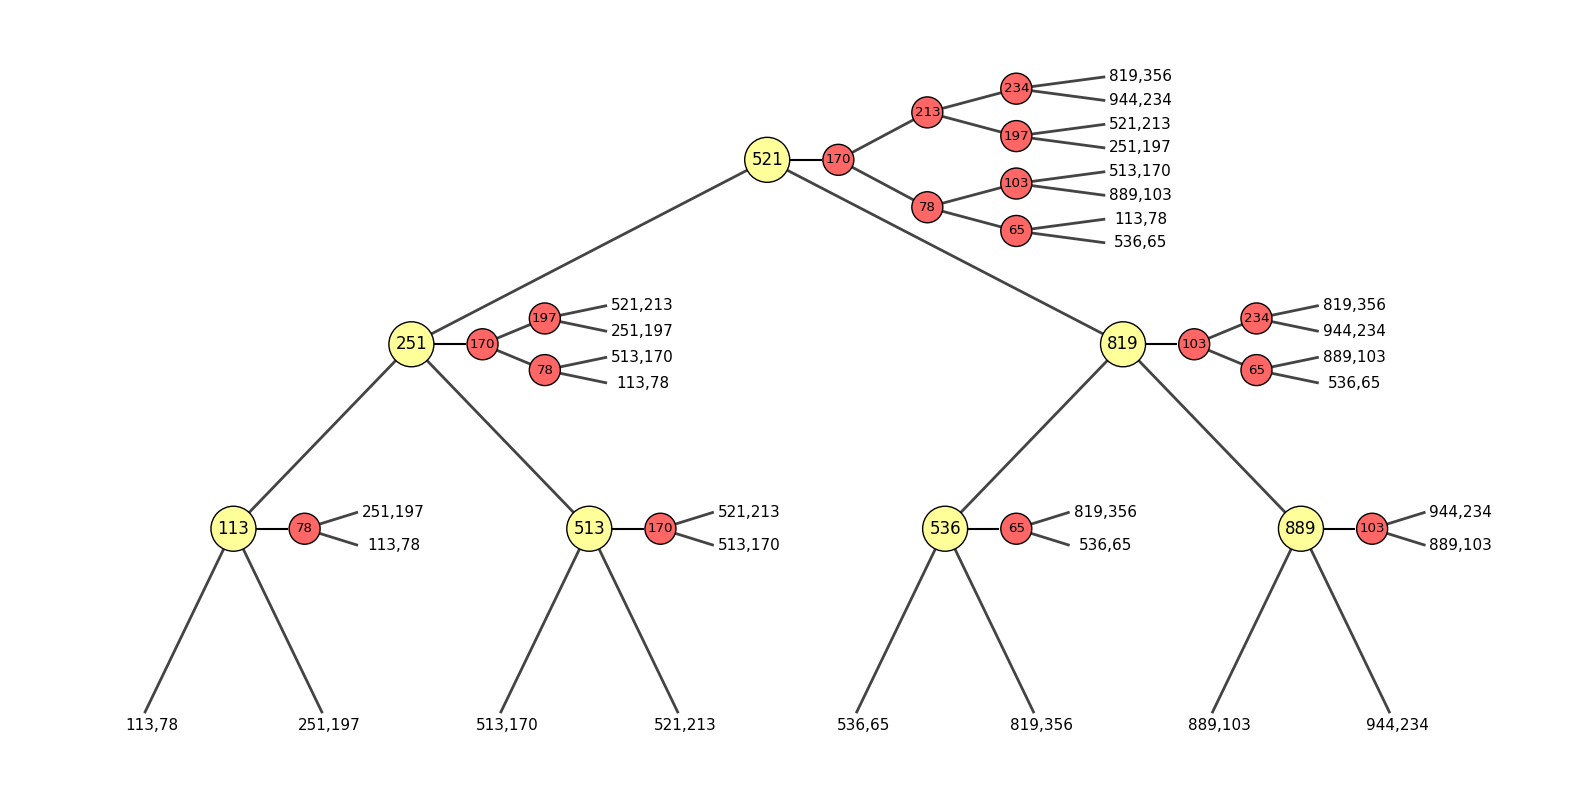

In [931]:
#####tree plot
import igraph as ig
import matplotlib.pyplot as plt
assoc_g = []
assoc_l = []
def plot_tree(node, g, is_assoc=False, parent=None, level=0):
    if is_assoc:
        color = "#FF000099"
        angle = 0
        dist = 1.7
        v_size = 45*0.7
        l_size = 12*0.8
    else:
        color = "#FFFF0066"
        angle = 200
        dist = 0.7
        v_size = 45
        l_size = 12
    if node is None:
        return None
    if isinstance(node, LeafNode):
        v = g.add_vertex(
            # name=node.point,
            type="leaf",
            shape="square",
            label=f'{int(node.point[0])},{int(node.point[1])}',
            label_size=11,
            label_dist=dist,
            color=color,
            level=level,
            width=0,
            height=0,
            label_angle=angle,
            )
        g.add_edge(parent, v)
        return 
    else:
        v = g.add_vertex(
            name=node.x_mid,
            level=level,
            type="internal",
            shape="circle",
            label=f'{int(node.x_mid)}',
            label_size=l_size,
            color=color,
            size=v_size
            )
    if parent:
        g.add_edge(parent, v)
    plot_tree(node.right, g, is_assoc=is_assoc, parent=v, level=level+1)
    plot_tree(node.left, g, is_assoc=is_assoc, parent=v, level=level+1)
    if not is_assoc:
        g_assoc = ig.Graph()
        plot_tree(node.assoc, g_assoc, is_assoc=True, parent=None)
        layout = g_assoc.layout_reingold_tilford(root=[0], mode="in")
        layout.rotate(-90)
        layout.scale(scale=0.5)
        # layout.center(p=g.layout().coords[v.index])
        # x_shift = max(coord[v.index] for coord in g.layout())  # Adjust the shift value as needed
        # for coord in layout:
            # coord[0] += x_shift
        assoc_g.append(g_assoc)
        assoc_l.append(v)
    # return g

g = ig.Graph()
plot_tree(root, g)    
layout = g.layout_reingold_tilford(root=[0], mode="in")
layout.rotate(180)
# layout.scale(scale=0.1) 
# layout.fit_into(bbox=(600, 400))
# g.vs["color"] = "#FFFF0066"
fig, ax = plt.subplots(figsize=(20, 10))
# g_u = ig.Graph().union([g,associated[0]])
# print(g_u)
# layout = g_u.layout_reingold_tilford(root=[0], mode="in")
# layout_assoc = associated[0].layout('rt')
# layout_assoc.rotate(-90)
# layout_assoc.center()
# x_shift = max(coord[0] for coord in layout) + 1  # Adjust the shift value as needed
# for coord in layout_assoc:
    # print(x_shift)
    # coord[0] += x_shift
# layout_assoc.coords[0][0] += 4.5
# layout_assoc.coords[1][0] += 4.5
# layout_assoc.coords[2][0] += 4.5
# layout_assoc.coords[0] = [2,2]
# print(layout.coords[2])
# layout_assoc.center(p=layout.coords[2])
# layout_assoc.mirror(dim=0)
# a = ig.Graph()
# for assoc in associated:
    # a += assoc
coords = layout.coords
l = layout
i = 0
for ga,v in zip(assoc_g,assoc_l):
    # g.add_edge(v, ga.vs[0])
    g += ga
    la = ga.layout_reingold_tilford(root=[0], mode="in")
    # la.fit_into(bbox=(500, 2))
    la.rotate(-90)
    # print(i)
    la.fit_into(bbox=(len(la)*0.5, len(la)*0.3), keep_aspect_ratio=False)
    la.scale(scale=0.2)
    p = layout.coords[v.index]
    # p[0] += 0.5
    # p[1] += 0.5
    la.center(p)
    # print(la.coords[0])
    # la.coords = [0,0]
    # print(la.coords[0])
    # la.mirror(dim=0)
    # print(layout.coords[v])
    # x_shift = max(coord[v] for coord in layout)  # Adjust the shift value as needed
    # print(v.attributes())
    dist = layout.coords[v.index][0] - la.coords[0][0]
    # print(dist)
    for j,coord in enumerate(la):
        coord[0] += dist+0.4
    coords += la.coords
    ax.plot([layout.coords[v.index][0]+0.13, la.coords[0][0]-0.1], [layout.coords[v.index][1], la.coords[0][1]], color='black')
    # ax.annotate("", xy=(la.coords[0][0], la.coords[0][1]), xytext=(layout.coords[v.index][0], layout.coords[v.index][1]),
            # arrowprops=dict(arrowstyle="-", color='black'))
    i+=1
    # print(g.vs[la])
    # g += ga
    # layout += la
print(layout.coords)
ig.plot(g, layout=coords, target=ax)
plt.show()

In [ ]:
# # Create the initial tree graph
# t1 = ig.Graph.Tree(12, 2)

# # Create the second tree graph
# t2 = ig.Graph.Tree(8, 2)

# # Generate the layout for the first tree
# layout1 = t1.layout_reingold_tilford(mode="in", root=[0])

# # Generate the layout for the second tree
# layout2 = t2.layout_reingold_tilford(mode="in", root=[0])

# # Invert the y-coordinates to flip the layout upside down for both trees
# for coord in layout1:
#     coord[1] = -coord[1]
# for coord in layout2:
#     coord[1] = -coord[1]

# # Rotate the second tree layout by -90 degrees and scale it down
# scale_factor = 0.5  # Adjust the scale factor as needed
# for coord in layout2:
#     coord[0], coord[1] = -coord[1] * scale_factor, coord[0] * scale_factor

# # Shift the second tree layout to the right of the first tree
# x_shift = max(coord[0] for coord in layout1) + 1  # Adjust the shift value as needed
# for coord in layout2:
#     coord[0] += x_shift

# # Combine the two graphs
# combined_graph = t1 + t2

# # Combine the layouts by converting them to lists and concatenating
# combined_layout = layout1.coords + layout2.coords

# # Create a new Layout object from the combined list
# combined_layout = ig.Layout(combined_layout)

# # Extract values from the range tree
# range_tree_values = extract_values_from_range_tree(None)  # Replace None with your actual range tree

# # Add these values as vertex labels to the main tree
# t1.vs["label"] = range_tree_values
# # Customize vertex colors and sizes
# vertex_colors = ["blue"] * t1.vcount() + ["red"] * t2.vcount()
# vertex_sizes = [20] * t1.vcount() + [10] * t2.vcount()  # Smaller vertices for the second tree

# # Plot the combined graph using matplotlib
# fig, ax = plt.subplots()
# visual_style = {
#     "vertex_size": vertex_sizes,
#     "vertex_color": vertex_colors,
#     "vertex_label": combined_graph.vs["label"] if "label" in combined_graph.vs.attributes() else None,
#     "layout": combined_layout,
#     "bbox": (600, 300),
#     "margin": 20
# }

# # Draw the combined graph with vertices
# ig.plot(combined_graph, target=ax, **visual_style)

# # Draw the vertices manually
# for idx, coord in enumerate(combined_layout):
#     if combined_graph.degree(idx) == 1:  # Leaf node
#         ax.scatter(coord[0], coord[1], s=vertex_sizes[idx]**2, c=vertex_colors[idx], marker='s')
#     else:  # Internal node
#         ax.scatter(coord[0], coord[1], s=vertex_sizes[idx]**2, c=vertex_colors[idx], marker='o')

# # Add vertex labels manually using ax.text
# for idx, coord in enumerate(layout1):
#     if "label" in t1.vs.attributes():
#         ax.annotate("1", xy=(coord[0], coord[1]), ha="center", va="center", xytext=(coord[0], coord[1]),color='black')

# # Add an arrow from the root node of the first tree to the root node of the second tree
# root1_coord = layout1[0]
# root2_coord = layout2[0]
# ax.annotate("", xy=(root2_coord[0], root2_coord[1]), xytext=(root1_coord[0], root1_coord[1]),
#             arrowprops=dict(arrowstyle="->", color='black'))

# plt.show()

In [63]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_rectangle(x_interval, y_interval):
    # Extract the intervals
    x, x_prime = x_interval
    y, y_prime = y_interval
    
    # Calculate the width and height of the rectangle
    width = x_prime - x
    height = y_prime - y
    
    # Create a figure and axis
    fig, ax = plt.subplots()
    
    # Create a rectangle
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the rectangle to the plot
    ax.add_patch(rect)
    
    # Set the limits of the plot
    ax.set_xlim(min(x, x_prime) - 1, max(x, x_prime) + 1)
    ax.set_ylim(min(y, y_prime) - 1, max(y, y_prime) + 1)
    
    # Set aspect of the plot to be equal
    ax.set_aspect('equal', adjustable='box')
    
    # Display the plot
    plt.show()

# Example usage
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_query(all_points, selected_points, x_interval, y_interval):
    # Extract the intervals
    x, x_prime = x_interval
    y, y_prime = y_interval
    
    # Calculate the width and height of the rectangle
    width = x_prime - x
    height = y_prime - y
    max_x = max(all_points[:, 0])
    min_x = min(all_points[:, 0])
    max_y = max(all_points[:, 1])
    min_y = min(all_points[:, 1])
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(14, 14))
    
    # Scatter all points
    all_points = np.array(all_points)
    ax.scatter(all_points[:, 0], all_points[:, 1], color='blue', label='All Points')
    for point in all_points:
        # ax.vlines(point[0], min_y-100, point[1], colors='black',alpha=0.7 , linestyles='dotted', linewidth=0.5)
        # ax.hlines(point[1], min_x-100, point[0], colors='black',alpha=0.7 , linestyles='dotted', linewidth=0.5)
        ax.annotate(f"({point[0]},{point[1]})", (point[0], point[1]), textcoords="offset points", xytext=(8,6), ha='center', fontsize=6)
    # Scatter selected points
    selected_points = np.array(selected_points)
    ax.scatter(selected_points[:, 0], selected_points[:, 1], color='red', label='Selected Points')
    
    # Create a rectangle
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='black', facecolor='none')
    
    # Add the rectangle to the plot
    ax.add_patch(rect)
    
    # Set the limits of the plot
    
    ax.set_xlim(min_x - 100, max_x + 100)    
    ax.set_ylim(min_y - 10, max_y + 50)
    # Set aspect of the plot to be equal
    ax.set_aspect('equal', adjustable='box')
    
    # Add legend
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
    # Display the plot
    plt.show()

# Example usage


187
151
Query range: x=(150, 400), y=(150, 300)
Found 12 points in the given range:
[[203 182]
 [250 187]
 [223 173]
 [293 160]
 [204 208]
 [226 233]
 [186 239]
 [255 269]
 [183 285]
 [340 151]
 [329 245]
 [368 284]]


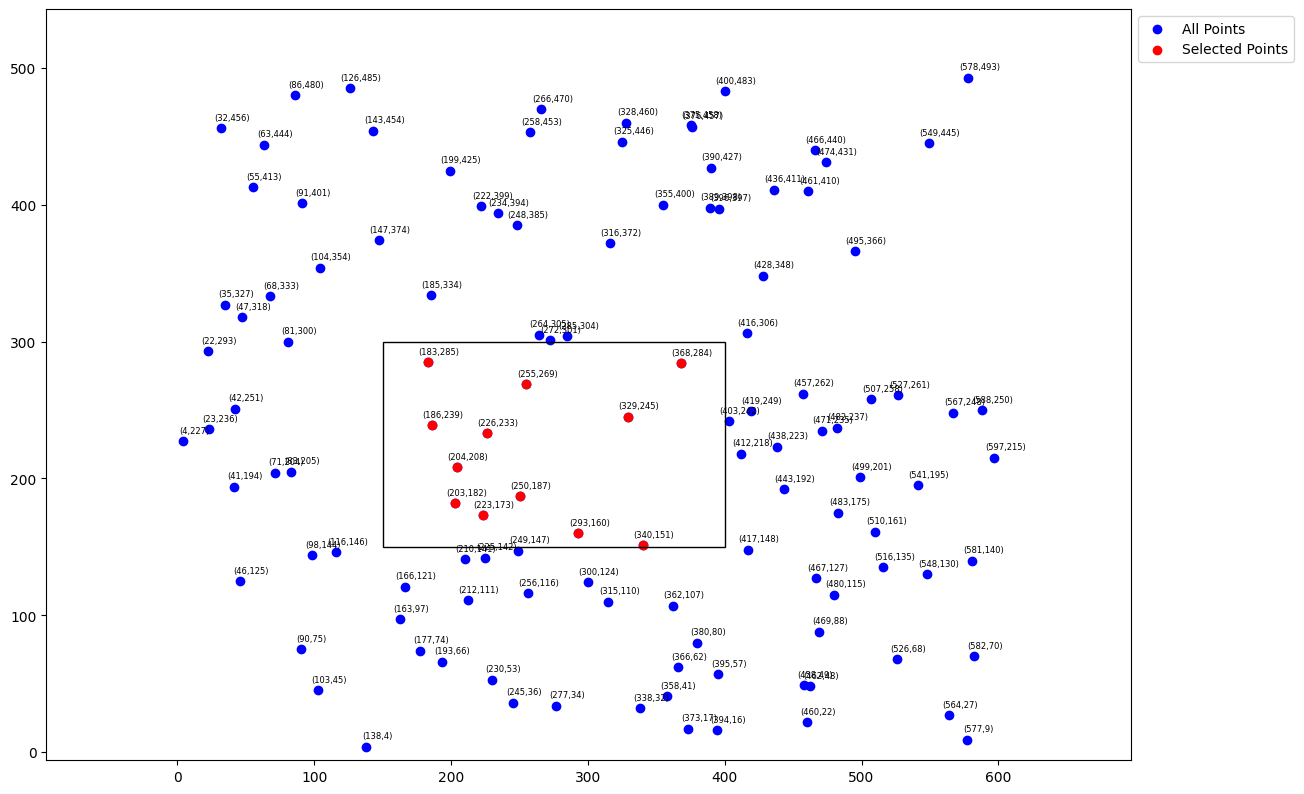

In [89]:
def range_query(root, x_range, y_range):
    report = []
    def split_node(node, x_range):
        while not isinstance(node, LeafNode) and (node.x_mid >= x_range[1] or node.x_mid < x_range[0]):
            if x_range[1] <= node.x_mid:
                node = node.left
            else:
                node = node.right
        return node
    def report_subtree(node):
        if isinstance(node, LeafNode):
            report.append(node.point)
        else:
            report.extend(node.S)
    def range_query_1d(node, r):
        node = split_node(node, r)
        if isinstance(node, LeafNode):
            if node.point[1] >= r[0] and node.point[1] <= r[1]:
                report.append(node.point)
        else:
            print(node.x_mid)
            v = node.left
            while not isinstance(v, LeafNode):
                if r[0] <= v.x_mid:
                    report_subtree(v.right)
                    v = v.left
                else:   
                    v = v.right
            if v.point[1] >= r[0] and v.point[1] <= r[1]:
                report.append(v.point)
            v = node.right
            while not isinstance(v, LeafNode):
                if r[1] >= v.x_mid:
                    report_subtree(v.left)
                    v = v.right
                else:
                    v = v.left
            if v.point[1] >= r[0] and v.point[1] <= r[1]:
                report.append(v.point)
    #####################################################################        
        
    node = split_node(root, x_range)
    # return []
    if isinstance(node, LeafNode):
        if node.point[1] >= y_range[0] and node.point[1] <= y_range[1] and node.point[0] >= x_range[0] and node.point[0] <= x_range[1]:
            report.append(node.point)
    else:
        v = node.left
        while not isinstance(v, LeafNode):
            if x_range[0] <= v.x_mid:
                range_query_1d(v.right.assoc, y_range)
                v = v.left
            else:
                v = v.right
        if v.point[0] >= x_range[0] and v.point[0] <= x_range[1] and v.point[1] >=  y_range[0] and v.point[1] <= y_range[1]:
            report.append(v.point)
        v = node.right
        while not isinstance(v, LeafNode):
            if x_range[1] >= v.x_mid:
                range_query_1d(v.left.assoc, y_range)
                v = v.right
            else:
                v = v.left
        if v.point[0] >= x_range[0] and v.point[0] <= x_range[1] and v.point[1] >=  y_range[0] and v.point[1] <= y_range[1]:
            report.append(v.point)
    # print(report)
    return report

# Helper function to print the results
def print_query_results(results):
    print(f"Found {len(results)} points in the given range:")
    print(np.array(results))
    # for point in results:
        # print(f"  {point}")

# Example usage
def example_query(root):
    x_range = (150, 400)
    y_range = (150, 300)
    results = range_query(root, x_range, y_range)
    print(f"Query range: x={x_range}, y={y_range}")
    print_query_results(results)
    plot_query(Px, results, x_range, y_range)

# To use this, you call:
example_query(root)

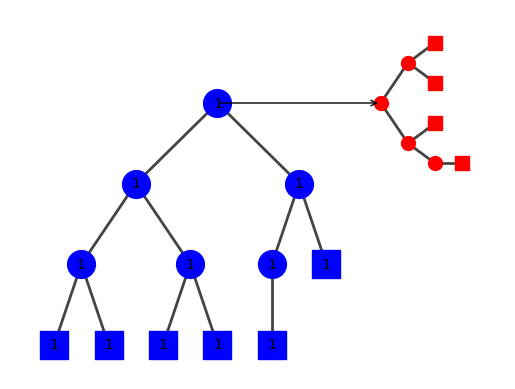